<a href="https://colab.research.google.com/github/hvakanksha/Twitter-Airline-Sentiment-Analysis/blob/main/Other_Algorithms_60_40.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing the Dataset and Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score 
import re
import warnings
import itertools
import numpy as np 
import pandas as pd 
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
#from keras_preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(actual, predicted):
    # Create confusion matrix
    cm = confusion_matrix(actual, predicted)

    # Plot confusion matrix
    sns.set(font_scale=1.4) # Adjust font size
    sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g')

    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('Tweets.csv')

In [5]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [7]:
df.text.head()

0                  @VirginAmerica What @dhepburn said.
1    @VirginAmerica plus you've added commercials t...
2    @VirginAmerica I didn't today... Must mean I n...
3    @VirginAmerica it's really aggressive to blast...
4    @VirginAmerica and it's a really big bad thing...
Name: text, dtype: object

#Exploratory Data Analysis

Countplot to see the distribution of each sentiment type

<Axes: xlabel='airline_sentiment', ylabel='count'>

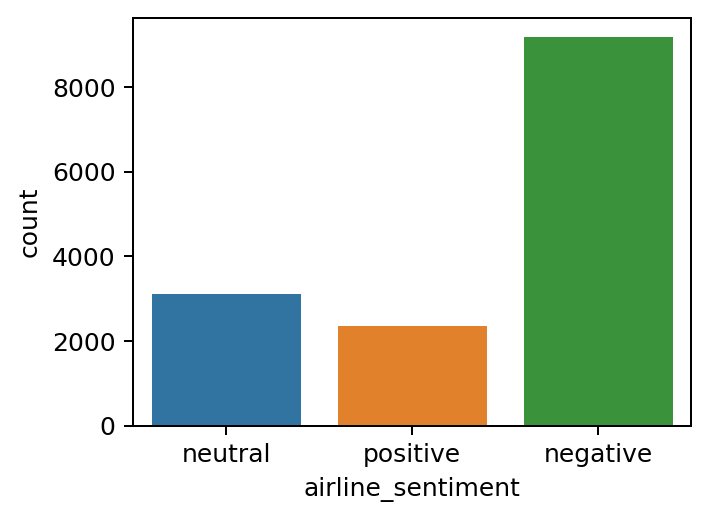

In [8]:
plt.figure(figsize=(4,3),dpi=180)
sns.countplot(x=df['airline_sentiment'])

In [9]:
df['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

Sentiment for each airline

<Axes: xlabel='airline', ylabel='count'>

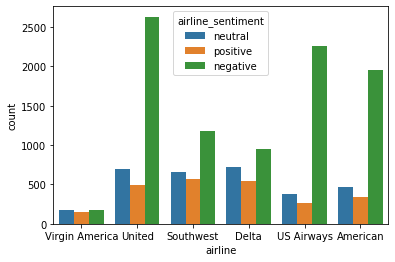

In [10]:
sns.countplot(x=df['airline'],hue=df['airline_sentiment'])

United has the most negative sentiments, while Virgin America has the lowest. Now let's look at percentage of the negative reviews for each airline.

In [11]:
neg_review = df[df['airline_sentiment']=='negative']

In [12]:
neg_review.shape

(9178, 15)

In [13]:
neg_review['airline_sentiment'].unique()

array(['negative'], dtype=object)

In [14]:
total_neg = pd.DataFrame(neg_review.groupby('airline')['airline_sentiment'].count())

In [15]:
total_neg = total_neg.reset_index()

In [16]:
total_neg

,airline,airline_sentiment
0,American,1960
1,Delta,955
2,Southwest,1186
3,US Airways,2263
4,United,2633
5,Virgin America,181


In [17]:
all_review = pd.DataFrame(df.groupby('airline')['airline_sentiment'].count()).reset_index()

In [18]:
all_review

,airline,airline_sentiment
0,American,2759
1,Delta,2222
2,Southwest,2420
3,US Airways,2913
4,United,3822
5,Virgin America,504


In [19]:
all_review.columns = ['airline','total_reviews']

In [20]:
all_review

,airline,total_reviews
0,American,2759
1,Delta,2222
2,Southwest,2420
3,US Airways,2913
4,United,3822
5,Virgin America,504


In [21]:
all_review['neg_reviews'] = total_neg['airline_sentiment']
all_review['neg_percent_reviews'] = all_review['neg_reviews'] / all_review['total_reviews']

In [22]:
all_review

,airline,total_reviews,neg_reviews,neg_percent_reviews
0,American,2759,1960,0.710402
1,Delta,2222,955,0.429793
2,Southwest,2420,1186,0.490083
3,US Airways,2913,2263,0.776862
4,United,3822,2633,0.688906
5,Virgin America,504,181,0.359127


<Axes: xlabel='airline', ylabel='neg_percent_reviews'>

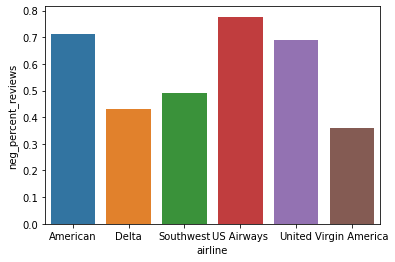

In [23]:
sns.barplot(data=all_review,x="airline",y="neg_percent_reviews")

From the graph:



1.   Virgin America has the most balanced sentiment.
2.   American, US Airways, and United each has majority negative sentiment.




Reasons given by costomers for Negative Reviews

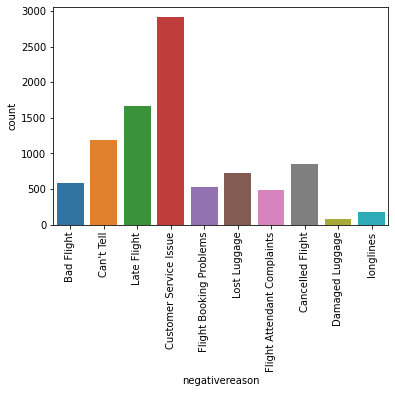

In [24]:
sns.countplot(x=df['negativereason'])
plt.xticks(rotation=90);

Customer service issue is the main reason of negative sentiment.

Data Cleaning

In [25]:
df = df[['text','airline_sentiment']]

In [26]:
df.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [27]:
df.shape

(14640, 2)

Checking for any missing values

In [28]:
df.isna().sum()

text                 0
airline_sentiment    0
dtype: int64

Checking for any duplicate values

In [29]:
df.duplicated().sum()

188

#Cleaning Textual Data

In [30]:
import re

In [31]:
def clean_text(text):
   
    text = str(text).lower() # convert text to lowercase
    text = re.sub('\[.*?\]', '', text) 
    text = re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '', text) # Remove URl and tags
    text = re.sub('<.*?>+', '', text)
    text = re.sub(r'[^a-z0-9\s]', '', text) # Remove punctuation
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [32]:
df['text'] = df['text'].apply(clean_text)

In [33]:
df['text'].head()

0                     virginamerica what dhepburn said
1    virginamerica plus youve added commercials to ...
2    virginamerica i didnt today must mean i need t...
3    virginamerica its really aggressive to blast o...
4    virginamerica and its a really big bad thing a...
Name: text, dtype: object

# Train Test Split: 60:40

The approach here will use Cross Validation on 90% of the dataset, and then judge the results on a final test set of 10% to evaluate the model

In [34]:
X = df['text']
y = df['airline_sentiment']

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [36]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8784,), (5856,), (8784,), (5856,))

**Feature Engineering**

We use TfidfVectorizer to convert a collection of raw documents to a matrix of TF-IDF features.

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [38]:
vectorizer = TfidfVectorizer(stop_words='english')

In [39]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [40]:
X_train

<8784x9582 sparse matrix of type '<class 'numpy.float64'>'
	with 75611 stored elements in Compressed Sparse Row format>

In [41]:
X_test

<5856x9582 sparse matrix of type '<class 'numpy.float64'>'
	with 47418 stored elements in Compressed Sparse Row format>

**Grid Search and Cross Validation**

In [42]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

In [43]:
def grid_search(model, parameters):
    # Use f1_weighted as scoring since we already know that the dataset has imbalance labels
    grid = HalvingGridSearchCV(estimator=model, param_grid=parameters,factor=2, cv=5, 
                               scoring='f1_weighted',random_state=42,error_score=0)
    grid.fit(X_train, y_train)
    print('Best Score : ',grid.best_score_)
    print('Best parameters : ',grid.best_params_)

##Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
logreg = LogisticRegression(class_weight='balanced')

In [46]:
logreg_param = [{'penalty':['l1','l2','none'],
               'solver': ['liblinear', 'saga'],
               'C':[0.001,0.01,0.1,1,10],
               'multi_class':['auto','ovr','multinomial']},
               {'penalty':['l2','none'],
               'solver': ['sag','newton-cg','lbfgs'],
               'C':[0.001,0.01,0.1,1,10],
               'multi_class':['auto','ovr','multinomial']}]

In [47]:
grid_search(logreg,logreg_param)

Best Score :  0.7244908090203105
Best parameters :  {'C': 10, 'multi_class': 'ovr', 'penalty': 'none', 'solver': 'saga'}


In [48]:
logreg_model = LogisticRegression(class_weight='balanced',C=0.1,multi_class='multinomial',penalty='l2',solver='sag')

In [49]:
logreg_model=logreg_model.fit(X_train,y_train)

In [50]:
y_predict=logreg_model.predict(X_test)

In [51]:
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predict))

Logistic Regression Accuracy:  0.7310450819672131


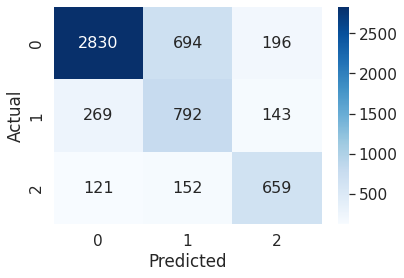

In [52]:
plot_confusion_matrix(y_test,y_predict)

##KNN Model

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
knn = KNeighborsClassifier()

In [55]:
knn_param = {'n_neighbors':list(range(5,30)),
            'weights':['uniform', 'distance'],
            'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}

In [56]:
grid_search(knn, knn_param)

Best Score :  0.7102691290254253
Best parameters :  {'algorithm': 'ball_tree', 'n_neighbors': 10, 'weights': 'distance'}


In [57]:
KNN_model = KNeighborsClassifier(algorithm='ball_tree',n_neighbors=12,weights='distance')

In [58]:
KNN_model=KNN_model.fit(X_train,y_train)

In [59]:
y_predict=KNN_model.predict(X_test)

In [60]:
print("KNN Accuracy: ",accuracy_score(y_test,y_predict))

KNN Accuracy:  0.7245560109289617


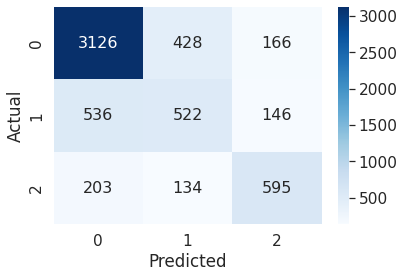

In [61]:
plot_confusion_matrix(y_test,y_predict)

##SVM

We use SVC-Support Vector Classifier here

In [62]:
from sklearn.svm import SVC

In [63]:
svc = SVC(class_weight='balanced')

In [64]:
svc_param = {'C':[0.001, 0.01, 0.1, 1, 10],
              'kernel':['linear','poly','rbf','sigmoid'],
              'gamma':['scale','auto',0.001, 0.01, 0.1, 1, 10]}

In [65]:
grid_search(svc, svc_param)

Best Score :  0.7469030077891097
Best parameters :  {'C': 10, 'gamma': 0.1, 'kernel': 'sigmoid'}


In [66]:
SVC_model = SVC(class_weight='balanced',C=1,gamma=1,kernel='linear')

In [67]:
SVC_model=SVC_model.fit(X_train,y_train)

In [68]:
y_predict=SVC_model.predict(X_test)

In [69]:
print("SVM Accuracy: ",accuracy_score(y_test,y_predict))

SVM Accuracy:  0.7496584699453552


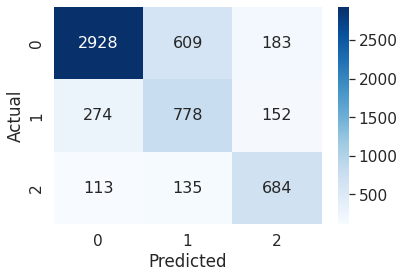

In [70]:
plot_confusion_matrix(y_test,y_predict)

##Naive Bayes Model

In [71]:
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB, ComplementNB

In [72]:
BNB_model = BernoulliNB()
GNB_model = GaussianNB()
MNB_model = MultinomialNB()
CNB_model = ComplementNB()
NB_param = {}

In [73]:
grid_search(BNB_model,NB_param)

Best Score :  0.6591856830592251
Best parameters :  {}


In [74]:
grid_search(MNB_model,NB_param)

Best Score :  0.5769865288683345
Best parameters :  {}


In [75]:
grid_search(CNB_model,NB_param)

Best Score :  0.7298466766683817
Best parameters :  {}


In [76]:
grid2 = HalvingGridSearchCV(estimator=GNB_model, param_grid=NB_param,factor=2, cv=5, 
                               scoring='f1_weighted',random_state=42,error_score=0)
grid2.fit(X_train.toarray(), y_train)
print('Best Score : ',grid2.best_score_)
print('Best parameters : ')
print(grid2.best_params_)

Best Score :  0.558832475313497
Best parameters : 
{}


Based on the results, MNB_model and GNB_model did not perform really well (with f1_score below 0.6). So, I will not use them for final evaluation. I will use BNB_model and CNB_model instead.

In [77]:
BNB_model = BernoulliNB()
CNB_model = ComplementNB()

BNB Accuracy and Confusion Matrix

In [78]:
BNB_model=BNB_model.fit(X_train,y_train)

In [79]:
y_predict=BNB_model.predict(X_test)

In [80]:
print("BNB Accuracy: ",accuracy_score(y_test,y_predict))

BNB Accuracy:  0.7325819672131147


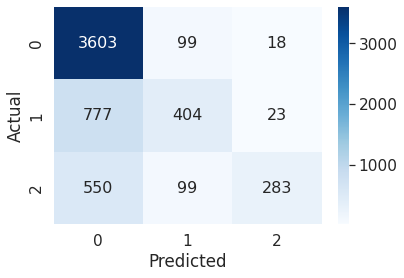

In [81]:
plot_confusion_matrix(y_test,y_predict)

CNB Accuracy and Confusion Matrix

In [82]:
CNB_model=CNB_model.fit(X_train,y_train)

In [83]:
y_predict=CNB_model.predict(X_test)

In [84]:
print("CNB Accuracy: ",accuracy_score(y_test,y_predict))

CNB Accuracy:  0.7744193989071039


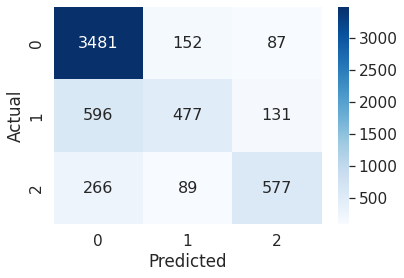

In [85]:
plot_confusion_matrix(y_test,y_predict)

##Decision Tree Model

In [86]:
from sklearn.tree import DecisionTreeClassifier

In [87]:
DecTree = DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [88]:
DT_param = {'criterion':['gini','entropy','log_loss'],
           'max_features':['sqrt','log2', None],
           'max_depth':[None,5,6,7,8,9,10,11,12,13,14,15]}

In [89]:
grid_search(DecTree,DT_param)

Best Score :  0.6443743789630878
Best parameters :  {'criterion': 'entropy', 'max_depth': None, 'max_features': None}


In [90]:
DTC_model = DecisionTreeClassifier(criterion='gini',max_features=None,max_depth=None,class_weight='balanced', random_state=42)

In [91]:
DTC_model=DTC_model.fit(X_train,y_train)

In [92]:
y_predict=DTC_model.predict(X_test)

In [93]:
print("DTC Accuracy: ",accuracy_score(y_test,y_predict))

DTC Accuracy:  0.6516393442622951


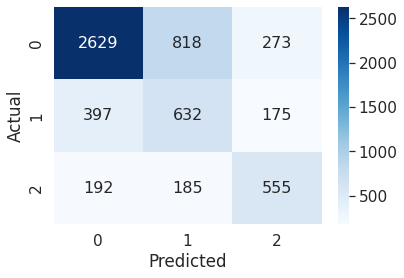

In [94]:
plot_confusion_matrix(y_test,y_predict)

##Random Forest Model

In [95]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
RFC = RandomForestClassifier(random_state=42, class_weight='balanced')

In [97]:
RFC_param = {'criterion':['gini','entropy','log_loss'],
           'max_features':['sqrt','log2', None],
            'n_estimators':[50,100,150,200,250,300,400],
            'max_depth':[None,5,6,7,8,9,10,11,12,13,14,15]}

In [98]:
RFC_model = RandomForestClassifier(criterion='entropy',max_features=None,n_estimators=400,max_depth=15,random_state=42, class_weight='balanced')

In [99]:
RFC_model=RFC_model.fit(X_train,y_train)

In [100]:
y_predict=RFC_model.predict(X_test)

In [101]:
print("RFC Accuracy: ",accuracy_score(y_test,y_predict))

RFC Accuracy:  0.6444672131147541


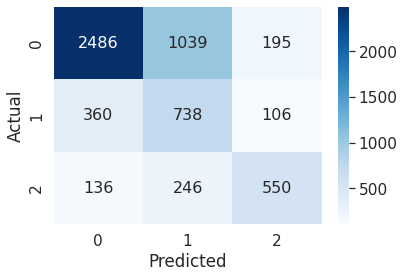

In [102]:
plot_confusion_matrix(y_test,y_predict)

##Bagging Classifier Model

Bagging Classifier Model will use final decision tree model (DTC_model) as base estimator.

In [103]:
from sklearn.ensemble import BaggingClassifier

In [104]:
Bagging = BaggingClassifier(base_estimator=DTC_model,random_state=42)

In [105]:
bag_param = {'n_estimators':[50,100,150,200,250,300,400],
            'bootstrap':[True,False]}

In [106]:
Bagging_model = BaggingClassifier(base_estimator=DTC_model,random_state=42,bootstrap=True,n_estimators=300)

In [107]:
Bagging_model=Bagging_model.fit(X_train,y_train)

In [108]:
y_predict=Bagging_model.predict(X_test)

In [109]:
print("Bagging Accuracy: ",accuracy_score(y_test,y_predict))

Bagging Accuracy:  0.7167008196721312


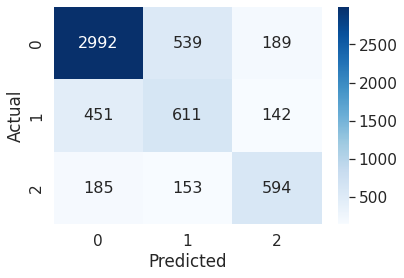

In [110]:
plot_confusion_matrix(y_test,y_predict)

##AdaBoost Classifier Model

AdaBoost Model will use final decision tree model (DTC_model) as base estimator.

In [111]:
from sklearn.ensemble import AdaBoostClassifier

In [112]:
Adaboost = AdaBoostClassifier(base_estimator=DTC_model,random_state=42)

In [113]:
Ada_param = {'n_estimators':[50,100,150,200,250,300,400],
            'learning_rate':[0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1]}

In [114]:
Adaboost_model = AdaBoostClassifier(learning_rate=0.1,n_estimators=100,base_estimator=DTC_model,random_state=42)

In [115]:
Adaboost_model=Adaboost_model.fit(X_train,y_train)

In [116]:
y_predict=Adaboost_model.predict(X_test)

In [117]:
print("AdaBoost Accuracy: ",accuracy_score(y_test,y_predict))

AdaBoost Accuracy:  0.6871584699453552


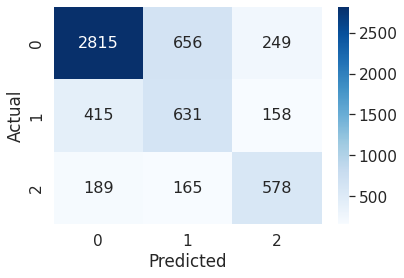

In [118]:
plot_confusion_matrix(y_test,y_predict)

##Gradient Boost Classifier Model

In [119]:
from sklearn.ensemble import GradientBoostingClassifier

In [120]:
from sklearn.ensemble import GradientBoostingClassifier

In [121]:
GB = GradientBoostingClassifier(random_state=42)

In [122]:
GB_param = {'n_estimators':[50,100,150,200,250,300,400],
            'learning_rate':[0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1],
           'max_features':['sqrt','log2',None],
           'max_depth':[None,5,6,7,8,9,10,11,12,13,14,15]}

In [123]:
GB_model = GradientBoostingClassifier(learning_rate=0.2,max_depth=7,max_features=None,n_estimators=200,random_state=42)

In [124]:
GB_model=GB_model.fit(X_train,y_train)

In [125]:
y_predict=GB_model.predict(X_test)

In [126]:
print("Gradient Boost Accuracy: ",accuracy_score(y_test,y_predict))

Gradient Boost Accuracy:  0.7556352459016393


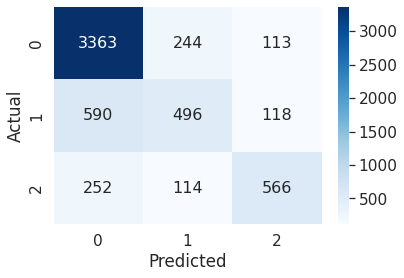

In [127]:
plot_confusion_matrix(y_test,y_predict)

##Extreme Gradient Boost Classifier

In [128]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50)
gbcl = gbcl.fit(X_train, y_train)

In [129]:
y_predict=gbcl.predict(X_test)

In [130]:
print("Extreme Gradient Boost Accuracy: ",accuracy_score(y_test,y_predict))

Extreme Gradient Boost Accuracy:  0.7173838797814208


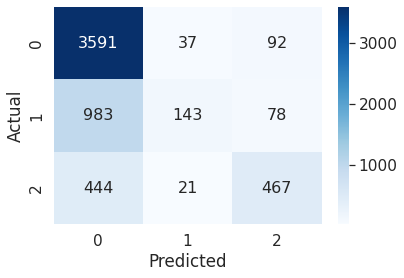

In [131]:
plot_confusion_matrix(y_test,y_predict)

##Model Evaluation

In [132]:
models = [logreg_model, KNN_model, SVC_model, BNB_model, CNB_model, DTC_model,
          RFC_model, Bagging_model, Adaboost_model, GB_model,gbcl]

In [133]:
from sklearn.metrics import accuracy_score,f1_score, ConfusionMatrixDisplay,classification_report

In [134]:
accuracy_scores = []
f1_scores = []

LogisticRegression(C=0.1, class_weight='balanced', multi_class='multinomial',
                   solver='sag')

              precision    recall  f1-score   support

    negative       0.88      0.76      0.82      3720
     neutral       0.48      0.66      0.56      1204
    positive       0.66      0.71      0.68       932

    accuracy                           0.73      5856
   macro avg       0.67      0.71      0.69      5856
weighted avg       0.76      0.73      0.74      5856



KNeighborsClassifier(algorithm='ball_tree', n_neighbors=12, weights='distance')

              precision    recall  f1-score   support

    negative       0.81      0.84      0.82      3720
     neutral       0.48      0.43      0.46      1204
    positive       0.66      0.64      0.65       932

    accuracy                           0.72      5856
   macro avg       0.65      0.64      0.64      5856
weighted avg       0.72      0.72      0.72      5856



SVC(C=1, class_weight='balanced', gamma=1

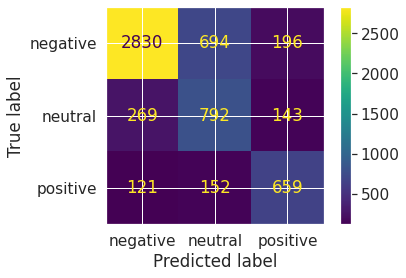

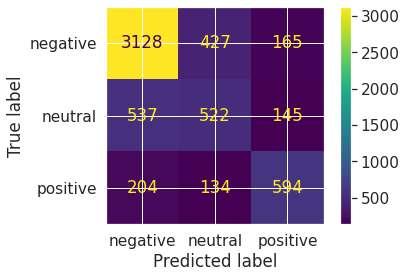

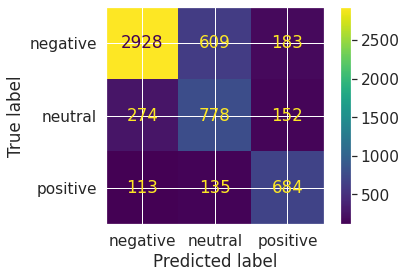

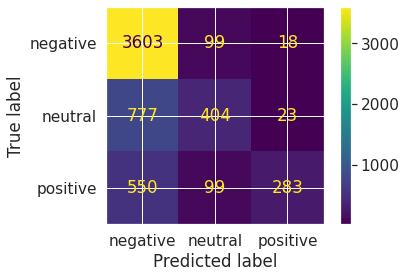

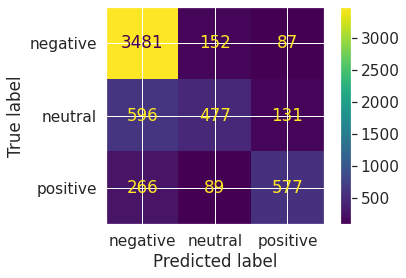

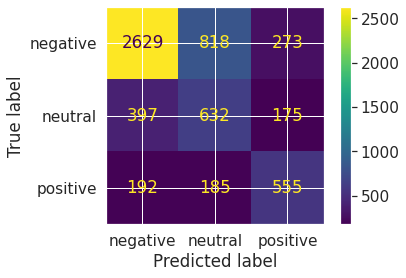

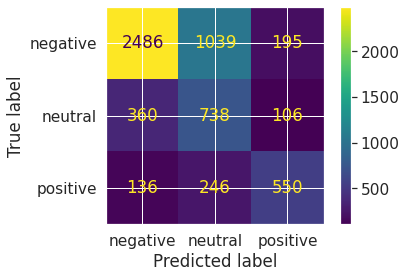

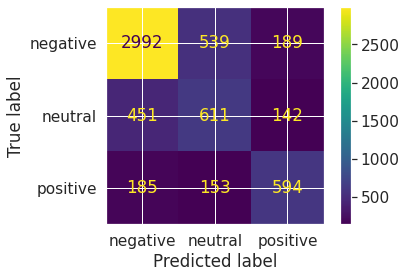

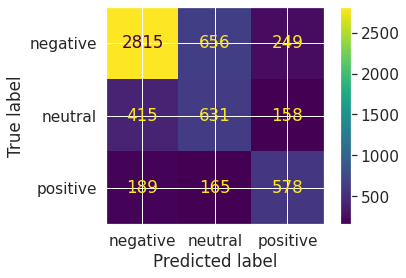

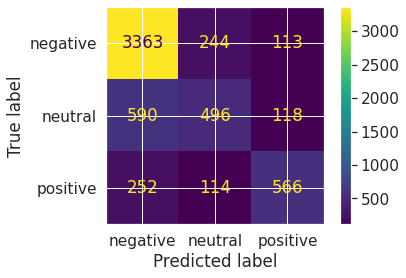

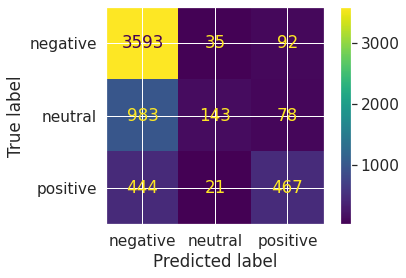

In [135]:
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test,y_pred)
    accuracy_scores.append(acc)
    
    f1 = f1_score(y_test,y_pred,average='weighted')
    f1_scores.append(f1)
    
    print(model)
    print()
    print(classification_report(y_test,y_pred,labels=model.classes_))
    print()
    ConfusionMatrixDisplay.from_predictions(y_test,y_pred,labels=model.classes_)
    print()

In [136]:
accuracy_scores

[0.7310450819672131,
 0.7247267759562842,
 0.7496584699453552,
 0.7325819672131147,
 0.7744193989071039,
 0.6516393442622951,
 0.6444672131147541,
 0.7167008196721312,
 0.6871584699453552,
 0.7556352459016393,
 0.7177254098360656]

In [137]:
f1_scores

[0.7413608138337305,
 0.7205024780451224,
 0.7577364182128413,
 0.6929058792745598,
 0.7569027740379852,
 0.6642607371261127,
 0.6634962071052026,
 0.7193599951631643,
 0.6946361577124697,
 0.7424411817410398,
 0.6589498781080713]

In [138]:
clf_model = ['Logistic Regression', 'KNN', 'SVC', 'Bernoulli NB', 'Complement NB', 'Decision Tree',
          'Random Forest', 'Bagging Tree', 'AdaBoost', 'Gradient Boosting','Extreme Gradient Boosting']

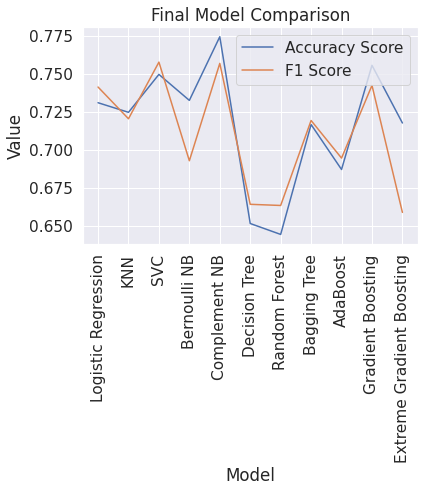

In [139]:
plt.plot(clf_model,accuracy_scores,label='Accuracy Score')
plt.plot(clf_model,f1_scores,label='F1 Score')
plt.xlabel('Model')
plt.ylabel('Value')
plt.title('Final Model Comparison')
plt.legend()
plt.xticks(rotation=90);